# 1. Cleaning data, dependent and independent variables

In [0]:
import pandas as pd
from sklearn import decomposition
import numpy as np

In [2]:
df_10yr_credit_spread=pd.read_csv("AAA10Y spread.csv") 
df_10yr_credit_spread = df_10yr_credit_spread.rename(columns={'AAA10Y': '10yr_creditspread'})
df_10yr_credit_spread['DATE'] =  pd.to_datetime(df_10yr_credit_spread['DATE'])
df_10yr_credit_spread.head(1)

,DATE,10yr_creditspread
0,1983-01-03,1.45


In [3]:
#independent variable
df_SP_500=pd.read_csv("S&P 500_yahoo finance.csv") 
df_SP_500 = df_SP_500.rename(columns={'Adj Close': 'SP_500_AdjClose','Date': 'DATE' })
df_SP_500['DATE'] =  pd.to_datetime(df_SP_500['DATE'])
df_SP_500 = df_SP_500[['DATE','SP_500_AdjClose']]
df_SP_500.head(1)

,DATE,SP_500_AdjClose
0,1927-12-30,17.66


In [4]:
#independent variable
df_CBOE_VIX=pd.read_csv("CBOE VIX_Yahoo finance.csv") 
df_CBOE_VIX = df_CBOE_VIX.rename(columns={'Adj Close': 'VIX_AdjClose','Date': 'DATE','VIX difference': 'VIX_difference' })
df_CBOE_VIX['DATE'] =  pd.to_datetime(df_CBOE_VIX['DATE'])
df_CBOE_VIX = df_CBOE_VIX[['DATE','VIX_AdjClose', 'VIX_difference']]
df_CBOE_VIX.head(1)

,DATE,VIX_AdjClose,VIX_difference
0,1990-01-02,17.24,NaN


In [5]:
#independent variable
df_CBOE_VIX_6M=pd.read_csv("CBOE VIX6M.csv") 
df_CBOE_VIX_6M = df_CBOE_VIX_6M.rename(columns={'Close': 'VIX_6M_AdjClose','Date': 'DATE'})
df_CBOE_VIX_6M['DATE'] =  pd.to_datetime(df_CBOE_VIX_6M['DATE'])
df_CBOE_VIX_6M = df_CBOE_VIX_6M[['DATE','VIX_6M_AdjClose']]
df_CBOE_VIX_6M.head(1)

,DATE,VIX_6M_AdjClose
0,2008-01-07,24.22


In [6]:
#independent variable
df_10yr_inflation=pd.read_csv("10 year break even inflation rate.csv") 
df_10yr_inflation = df_10yr_inflation.rename(columns={'T10YIE': '10Yr_Inflation','Date': 'DATE'})
df_10yr_inflation['DATE'] =  pd.to_datetime(df_10yr_inflation['DATE'])
df_10yr_inflation.head(1)

,DATE,10Yr_Inflation
0,2003-01-02,1.64


In [7]:
#independent variable
df_10T_fedfund=pd.read_csv("10 year treasury minus fed fund.csv")
df_10T_fedfund = df_10T_fedfund.rename(columns={'T10YFF': '10Yr_FedFund'})
df_10T_fedfund['DATE'] =  pd.to_datetime(df_10T_fedfund['DATE'])
df_10T_fedfund.head(1)

,DATE,10Yr_FedFund
0,1962-01-02,1.31


In [8]:
#independent variable
df_TED_Spread=pd.read_csv("TED_Spread.csv") 
df_TED_Spread = df_TED_Spread.rename(columns={'Date': 'DATE'})
df_TED_Spread['DATE'] =  pd.to_datetime(df_TED_Spread['DATE'])
df_TED_Spread.head(1)

,DATE,TEDRATE
0,1986-01-02,0.9


In [9]:
#independent variable
df_IP=pd.read_csv("IP.csv")
df_IP = df_IP.rename(columns={'IPB50001N': 'IP'})
df_IP['DATE'] =  pd.to_datetime(df_IP['DATE'])
df_IP.head(1)

,DATE,IP
0,1919-01-01,4.9286


In [10]:
#independent variable
df_UNRATE=pd.read_csv("UNRATE.csv")
df_UNRATE['DATE'] =  pd.to_datetime(df_UNRATE['DATE'])
df_UNRATE.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [0]:
#independent variable
df_all_Trates=pd.read_csv("USTREASURY-YIELD_QUANDL.csv")
df_all_Trates = df_all_Trates.rename(columns={'Date': 'DATE'})
df_all_Trates['DATE'] =  pd.to_datetime(df_all_Trates['DATE'])
df_all_Trates = df_all_Trates[['DATE','3 MO','6 MO','1 YR', '2 YR', '3 YR', '5 YR','7 YR', '10 YR', '20 YR', '30 YR','Slope','Curvature']]

In [0]:
#merge all dependent, independent variables (except UNRATE, IP) to one dataframe 'df'

df = df_10yr_credit_spread.merge(df_10yr_inflation,on='DATE').merge(df_10T_fedfund,on='DATE').merge(df_SP_500,on='DATE').merge(df_CBOE_VIX,on='DATE').merge(df_CBOE_VIX_6M,on='DATE').merge(df_TED_Spread,on='DATE').merge(df_all_Trates,on='DATE')


In [0]:
#forward filling, where values are not available for any particular day

df.fillna(method='ffill', inplace=True)

In [0]:
# creating lagged autocorrelations for the dependent variable

df['10yr_cs_AR5'] = df['10yr_creditspread'].shift(1).rolling(5).apply(lambda x: x.autocorr(), raw=False)
df['10yr_cs_AR20'] = df['10yr_creditspread'].shift(1).rolling(20).apply(lambda x: x.autocorr(), raw=False)
df['10yr_cs_AR60'] = df['10yr_creditspread'].shift(1).rolling(60).apply(lambda x: x.autocorr(), raw=False)

In [15]:
df.head(2)

,DATE,10yr_creditspread,10Yr_Inflation,10Yr_FedFund,SP_500_AdjClose,VIX_AdjClose,VIX_difference,VIX_6M_AdjClose,TEDRATE,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Slope,Curvature,10yr_cs_AR5,10yr_cs_AR20,10yr_cs_AR60
0,2008-01-07,1.43,2.29,-0.41,1416.180054,23.790001,-0.150000,24.22,1.35,3.27,3.29,3.11,2.76,2.76,3.16,3.46,3.86,4.37,4.34,1.07,-0.5100,NaN,NaN,NaN
1,2008-01-08,1.45,2.29,-0.41,1390.189941,25.430000,1.639999,25.18,1.34,3.25,3.27,3.09,2.76,2.76,3.16,3.47,3.86,4.39,4.35,1.10,-0.5025,NaN,NaN,NaN


In [0]:
# merging UNRATE, IP dataframes to main dataframe 'df'. As this is monthly data, forward filling the same value for entire month till next value is published

df = df.merge(df_UNRATE, on = 'DATE', how = 'left')
df = df.merge(df_IP, on = 'DATE', how = 'left')

# dropping ALL duplicte values
df.sort_values("DATE", inplace = True) 
df.drop_duplicates(subset ="DATE", keep = False, inplace = True) 
df.fillna(method='ffill', inplace=True)

In [17]:
df.head(2)

,DATE,10yr_creditspread,10Yr_Inflation,10Yr_FedFund,SP_500_AdjClose,VIX_AdjClose,VIX_difference,VIX_6M_AdjClose,TEDRATE,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Slope,Curvature,10yr_cs_AR5,10yr_cs_AR20,10yr_cs_AR60,UNRATE,IP
0,2008-01-07,1.43,2.29,-0.41,1416.180054,23.790001,-0.150000,24.22,1.35,3.27,3.29,3.11,2.76,2.76,3.16,3.46,3.86,4.37,4.34,1.07,-0.5100,NaN,NaN,NaN,NaN,NaN
1,2008-01-08,1.45,2.29,-0.41,1390.189941,25.430000,1.639999,25.18,1.34,3.25,3.27,3.09,2.76,2.76,3.16,3.47,3.86,4.39,4.35,1.10,-0.5025,NaN,NaN,NaN,NaN,NaN


In [18]:
# dropping the NA values as our maximum autocorrelation is with 60 day 

df= df[61:]
df = df.reset_index()
del df['index']
df.isnull().values.any()

False

In [19]:
df.shape

(3008, 26)

In [20]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,10yr_creditspread,10Yr_Inflation,10Yr_FedFund,SP_500_AdjClose,VIX_AdjClose,VIX_difference,VIX_6M_AdjClose,TEDRATE,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Slope,Curvature,10yr_cs_AR5,10yr_cs_AR20,10yr_cs_AR60,UNRATE,IP
10yr_creditspread,1.000000,-0.319399,0.476979,-0.754844,0.592271,-0.012922,0.662969,0.406567,-0.698237,-0.661062,-0.643612,-0.640224,-0.605720,-0.451230,-0.272054,-0.053233,0.194626,0.207905,0.594539,-0.226340,0.028391,-0.023470,0.035927,0.546384,-0.608756
10Yr_Inflation,-0.319399,1.000000,0.217552,-0.102332,-0.549117,0.001964,-0.519398,-0.439481,-0.020709,-0.057955,-0.071749,-0.056503,-0.030692,0.077325,0.168373,0.268475,0.296652,0.405454,0.265350,-0.227002,-0.054945,-0.016395,0.082188,0.301425,-0.017210
10Yr_FedFund,0.476979,0.217552,1.000000,-0.804666,0.237223,-0.020975,0.346465,0.040086,-0.701201,-0.668157,-0.613977,-0.466621,-0.281185,0.114925,0.399954,0.607823,0.752793,0.794975,0.960847,0.201555,0.023741,0.000755,0.075614,0.803774,-0.797059
SP_500_AdjClose,-0.754844,-0.102332,-0.804666,1.000000,-0.481552,-0.002377,-0.621794,-0.253927,0.678930,0.644480,0.607038,0.528808,0.417783,0.118083,-0.146907,-0.411650,-0.644744,-0.675931,-0.872144,0.111763,-0.015226,0.010138,-0.119716,-0.897631,0.876780
VIX_AdjClose,0.592271,-0.549117,0.237223,-0.481552,1.000000,0.115495,0.950630,0.652691,-0.173638,-0.121284,-0.093627,-0.076119,-0.048343,0.024607,0.091994,0.175643,0.267477,0.175465,0.224736,0.020321,0.043226,0.013265,0.122277,0.281206,-0.407241
VIX_difference,-0.012922,0.001964,-0.020975,-0.002377,0.115495,1.000000,0.041999,0.034786,0.009048,0.012848,0.010207,0.005250,0.003165,0.001558,-0.001936,-0.002526,-0.005110,-0.006919,-0.010359,-0.010197,-0.016751,-0.007874,-0.003984,-0.008605,0.011728
VIX_6M_AdjClose,0.662969,-0.519398,0.346465,-0.621794,0.950630,0.041999,1.000000,0.563384,-0.283099,-0.237135,-0.205864,-0.174739,-0.134955,-0.031641,0.075119,0.192572,0.325352,0.247132,0.342199,-0.006493,0.044152,0.005025,0.119201,0.448598,-0.577612
TEDRATE,0.406567,-0.439481,0.040086,-0.253927,0.652691,0.034786,0.563384,1.000000,0.070776,0.162676,0.206689,0.222620,0.229145,0.245580,0.222859,0.240691,0.236345,0.127678,0.032161,0.203890,0.003329,0.002126,0.098525,-0.068294,-0.119183
3 MO,-0.698237,-0.020709,-0.701201,0.678930,-0.173638,0.009048,-0.283099,0.070776,1.000000,0.992148,0.975306,0.924421,0.835301,0.581595,0.339873,0.115512,-0.118825,-0.205954,-0.794414,0.112001,-0.028007,0.021253,0.018387,-0.679361,0.608430
6 MO,-0.661062,-0.057955,-0.668157,0.644480,-0.121284,0.012848,-0.237135,0.162676,0.992148,1.000000,0.993337,0.952278,0.870742,0.627267,0.386403,0.161478,-0.078599,-0.173942,-0.769307,0.175976,-0.026560,0.023124,0.022553,-0.681938,0.581747


# 2. Split train and test data to perform different tests and build models

In [0]:
#divide data into training and testing, time series data so not random split

train_pre_pca = df[:2500]
test_pre_pca = df[2500:]

train = df[:2500]
test = df[2500:]

# 3. PCA - testing with dimensionality reduction of 'treasury yield data'

In [22]:
train_pre_pca.columns

Index(['DATE', '10yr_creditspread', '10Yr_Inflation', '10Yr_FedFund',
       'SP_500_AdjClose', 'VIX_AdjClose', 'VIX_difference', 'VIX_6M_AdjClose',
       'TEDRATE', '3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR',
       '10 YR', '20 YR', '30 YR', 'Slope', 'Curvature', '10yr_cs_AR5',
       '10yr_cs_AR20', '10yr_cs_AR60', 'UNRATE', 'IP'],
      dtype='object')

In [0]:
#reduce yield curve dimensions : PCA
train_pca_features = ['3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR', '10 YR', '20 YR', '30 YR']
train_pca = train_pre_pca[train_pca_features]

#PCA
pca = decomposition.PCA(n_components=3)
pca.fit(train_pca)

#transform train data and save to dataframe
train_pca = pca.transform(train_pca)
x_train_pca = pd.DataFrame(train_pca)
x_train_pca = x_train_pca.rename(columns={0: 'PCA_Yield_1',1: 'PCA_Yield_2',2: 'PCA_Yield_3' })

In [24]:
pca.explained_variance_ratio_.sum()

0.9939493986666671

In [25]:
#perform on test data
test_pca_features = ['3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR', '10 YR', '20 YR', '30 YR']
test_pca = test_pre_pca[test_pca_features]
test_pca = pca.transform(test_pca)
x_test_pca = pd.DataFrame(test_pca)
x_test_pca = x_test_pca.rename(columns={0: 'PCA_Yield_1',1: 'PCA_Yield_2',2: 'PCA_Yield_3' })
x_test_pca.head()

,PCA_Yield_1,PCA_Yield_2,PCA_Yield_3
0,2.068059,2.738829,0.074474
1,2.118962,2.772210,0.073925
2,2.155235,2.779286,0.044297
3,2.128069,2.807929,0.037931
4,2.251092,2.783388,0.028700


In [0]:
# drop treasury yields from train data and merge pca features to train data to form new dataframe

train_1= train_pre_pca[['DATE', '10yr_creditspread', '10Yr_Inflation', '10Yr_FedFund',
       'SP_500_AdjClose', 'VIX_AdjClose', 'VIX_difference', 'VIX_6M_AdjClose',
       'TEDRATE','Slope', 'Curvature', '10yr_cs_AR5',
       '10yr_cs_AR20', '10yr_cs_AR60', 'UNRATE', 'IP']]
    
train_post_pca= pd.concat([train_1, x_train_pca], axis=1, ignore_index=True)

train_post_pca = train_post_pca.rename(columns={0:'DATE', 1:'10yr_creditspread', 2:'10Yr_Inflation',
  3:'10Yr_FedFund',4:'SP_500_AdjClose', 5:'VIX_AdjClose', 6:'VIX_difference', 7: 'VIX_6M_AdjClose',
  8: 'TEDRATE', 9: 'Slope', 10: 'Curvature',11: '10yr_cs_AR5', 12: '10yr_cs_AR20', 13: '10yr_cs_AR60', 14: 'UNRATE', 15: 'IP', 
  16:'PCA_Yield_1',17:'PCA_Yield_2',18: 'PCA_Yield_3' })

In [27]:
train_post_pca.head(1)

,DATE,10yr_creditspread,10Yr_Inflation,10Yr_FedFund,SP_500_AdjClose,VIX_AdjClose,VIX_difference,VIX_6M_AdjClose,TEDRATE,Slope,Curvature,10yr_cs_AR5,10yr_cs_AR20,10yr_cs_AR60,UNRATE,IP,PCA_Yield_1,PCA_Yield_2,PCA_Yield_3
0,2008-04-04,1.95,2.32,1.24,1370.400024,22.450001,-0.759998,24.06,1.4,2.97,-0.0375,0.963742,0.315414,0.965656,5.0,102.5509,2.992411,0.730595,0.632997


In [28]:
corr = train_post_pca.corr()
corr.style.background_gradient(cmap='coolwarm')

,10yr_creditspread,10Yr_Inflation,10Yr_FedFund,SP_500_AdjClose,VIX_AdjClose,VIX_difference,VIX_6M_AdjClose,TEDRATE,Slope,Curvature,10yr_cs_AR5,10yr_cs_AR20,10yr_cs_AR60,UNRATE,IP,PCA_Yield_1,PCA_Yield_2,PCA_Yield_3
10yr_creditspread,1.000000,-0.436098,0.198276,-0.649040,0.657813,-0.010455,0.683958,0.454527,0.324784,-0.315317,0.036164,-0.010104,-0.038942,0.356428,-0.439106,-0.195849,-0.383896,0.245362
10Yr_Inflation,-0.436098,1.000000,0.131839,-0.010415,-0.543500,0.006596,-0.530036,-0.456473,0.257800,-0.364356,-0.049588,0.000897,0.122502,0.283270,0.085545,0.087155,-0.244346,0.384373
10Yr_FedFund,0.198276,0.131839,1.000000,-0.641612,0.327889,-0.017871,0.372394,-0.031665,0.937724,0.090454,0.039295,0.042752,0.087160,0.720877,-0.701205,0.452304,-0.845730,-0.193874
SP_500_AdjClose,-0.649040,-0.010415,-0.641612,1.000000,-0.655150,-0.007901,-0.749209,-0.287170,-0.747158,0.287593,-0.032965,-0.033371,-0.120497,-0.857737,0.817466,-0.236602,0.698862,-0.327395
VIX_AdjClose,0.657813,-0.543500,0.327889,-0.655150,1.000000,0.111487,0.954941,0.669245,0.293174,0.028771,0.024784,-0.016189,0.080606,0.343768,-0.521457,0.249738,-0.220878,0.094300
VIX_difference,-0.010455,0.006596,-0.017871,-0.007901,0.111487,1.000000,0.039849,0.056658,-0.005266,-0.007202,-0.018788,-0.004831,-0.004061,-0.007823,0.013067,0.009819,0.010365,0.013373
VIX_6M_AdjClose,0.683958,-0.530036,0.372394,-0.749209,0.954941,0.039849,1.000000,0.553481,0.351438,-0.017927,0.031733,-0.012709,0.079871,0.476158,-0.655463,0.203547,-0.297802,0.112679
TEDRATE,0.454527,-0.456473,-0.031665,-0.287170,0.669245,0.056658,0.553481,1.000000,-0.048267,0.197455,-0.007203,-0.011267,0.089182,-0.129335,-0.101389,0.376453,0.197223,0.126917
Slope,0.324784,0.257800,0.937724,-0.747158,0.293174,-0.005266,0.351438,-0.048267,1.000000,-0.142826,0.044722,0.054040,0.106720,0.828332,-0.711524,0.317360,-0.943186,0.004767
Curvature,-0.315317,-0.364356,0.090454,0.287593,0.028771,-0.007202,-0.017927,0.197455,-0.142826,1.000000,-0.009814,-0.015726,-0.121369,-0.419559,0.051521,0.504968,0.330540,-0.766053


In [0]:
# drop treasury yields from test data and merge pca features to test data to form new dataframe

test_1= test_pre_pca[['DATE', '10yr_creditspread', '10Yr_Inflation', '10Yr_FedFund',
       'SP_500_AdjClose', 'VIX_AdjClose', 'VIX_difference', 'VIX_6M_AdjClose',
       'TEDRATE','Slope', 'Curvature', '10yr_cs_AR5',
       '10yr_cs_AR20', '10yr_cs_AR60', 'UNRATE', 'IP']]
test_1 = test_1.reset_index(drop=True) #change index to 0,1,2, from 1000's to merge dataframes

test_post_pca= pd.concat([test_1, x_test_pca], axis=1, ignore_index=True)

test_post_pca = test_post_pca.rename(columns={0:'DATE', 1:'10yr_creditspread', 2:'10Yr_Inflation',
  3:'10Yr_FedFund',4:'SP_500_AdjClose', 5:'VIX_AdjClose', 6:'VIX_difference', 7: 'VIX_6M_AdjClose',
  8: 'TEDRATE', 9: 'Slope', 10: 'Curvature',11: '10yr_cs_AR5', 12: '10yr_cs_AR20', 13: '10yr_cs_AR60', 14: 'UNRATE', 15: 'IP', 
  16:'PCA_Yield_1',17:'PCA_Yield_2',18: 'PCA_Yield_3' })


In [30]:
test_post_pca.head(1)

,DATE,10yr_creditspread,10Yr_Inflation,10Yr_FedFund,SP_500_AdjClose,VIX_AdjClose,VIX_difference,VIX_6M_AdjClose,TEDRATE,Slope,Curvature,10yr_cs_AR5,10yr_cs_AR20,10yr_cs_AR60,UNRATE,IP,PCA_Yield_1,PCA_Yield_2,PCA_Yield_3
0,2018-04-06,1.01,2.07,1.08,2604.469971,21.49,2.549999,21.41,0.64,1.28,0.2125,0.228665,0.536457,0.883585,4.0,107.3264,2.068059,2.738829,0.074474


In [0]:
#prepraring train data post PCA
x_train_1 = train_post_pca.drop('10yr_creditspread', axis=1)
x_train_post_pca = x_train_1.drop('DATE', axis=1)
y_train_post_pca = train_post_pca['10yr_creditspread']

#prepraring test data post PCA
x_test_1 = test_post_pca.drop('10yr_creditspread', axis=1)
x_test_post_pca = x_test_1.drop('DATE', axis=1)
y_test_post_pca = test_post_pca['10yr_creditspread']

In [0]:
#prepraring train data pre PCA
x_train_2 = train_pre_pca.drop('10yr_creditspread', axis=1)
x_train_pre_pca = x_train_2.drop('DATE', axis=1)
y_train_pre_pca = train_pre_pca['10yr_creditspread']

#prepraring test data pre PCA
x_test_2 = test_pre_pca.drop('10yr_creditspread', axis=1)
x_test_pre_pca = x_test_2.drop('DATE', axis=1)
y_test_pre_pca = test_pre_pca['10yr_creditspread']

# 4.Build Regression models



## Using pycaret 
#### Compares the results from 20 different models for regression before implementation

In [33]:
!pip install pycaret

In [0]:
from pycaret.regression import*

In [35]:
#set up data for pycaret

a=setup(train_pre_pca, target='10yr_creditspread', session_id=11, silent=True,profile=False);

 
Setup Succesfully Completed!


,Description,Value
0,session_id,11
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2500, 26)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [36]:
compare_models(blacklist=['tr'],fold = 4, turbo=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.026500,0.001500,0.038300,0.983100,0.013100,0.014700
1,CatBoost Regressor,0.032500,0.002200,0.046400,0.975500,0.015700,0.018000
2,Random Forest,0.032300,0.002400,0.049300,0.972200,0.016900,0.018000
3,Light Gradient Boosting Machine,0.033800,0.002600,0.050900,0.970400,0.017700,0.018900
4,Gradient Boosting Regressor,0.048500,0.004200,0.064900,0.951700,0.022700,0.027100
5,Extreme Gradient Boosting,0.048700,0.004300,0.065400,0.951000,0.022800,0.027200
6,Decision Tree,0.042300,0.005400,0.072400,0.939900,0.024800,0.023500
7,Bayesian Ridge,0.057000,0.005400,0.073600,0.937900,0.025700,0.031800
8,Linear Regression,0.056900,0.005400,0.073700,0.937800,0.025600,0.031800
9,Random Sample Consensus,0.056300,0.005700,0.075700,0.934400,0.026200,0.031400


## 4.1 Linear regression

In [37]:
#linear regression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regr = linear_model.LinearRegression()

#PRE - PCA

# Train the model using the training sets
regr.fit(x_train_pre_pca, y_train_pre_pca)

# Make predictions using the testing set
y_pred_lr_pre_pca = regr.predict(x_test_pre_pca)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_pre_pca, y_pred_lr_pre_pca))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_pre_pca, y_pred_lr_pre_pca))



Coefficients: 
 [-2.29252854e-01  1.69846914e-01 -2.86745191e-04  6.03343578e-03
 -4.24581961e-03 -7.42516509e-03  2.14618725e-01  1.40241328e+00
  1.70904828e-02  2.55553891e-01 -3.68969895e-01  6.27227109e-02
 -3.82015786e-01  3.07464382e-01 -1.61845431e+00  7.45833462e-01
 -6.23662855e-01  1.23464018e+00  6.28404082e-01 -5.50355925e-03
 -5.37906791e-02 -2.48707756e-02 -1.20192384e-01 -6.65350803e-03]
Mean squared error: 0.05
Coefficient of determination: 0.39


In [38]:
#POST - PCA

# Train the model using the training sets
regr.fit(x_train_post_pca, y_train_post_pca)

# Make predictions using the testing set
y_pred_lr_post_pca = regr.predict(x_test_post_pca)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_post_pca, y_pred_lr_post_pca))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_post_pca, y_pred_lr_post_pca))

Coefficients: 
 [-2.59096619e-01  7.16607689e-02 -3.23626980e-04  5.34928224e-03
 -3.97415273e-03 -7.05442835e-03  1.07308478e-01  2.12221454e-02
  1.51352290e+00 -2.94772460e-03 -2.76981088e-02 -6.12197631e-02
 -1.37953385e-01 -1.42643872e-02 -1.71302268e-01 -2.41922464e-01
  1.10197062e+00]
Mean squared error: 0.05
Coefficient of determination: 0.35


## 4.2 Decision tree

In [0]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# check for the sklearn version, it has to be 0.21 or above
#import sklearn
#print(sklearn.__version__)

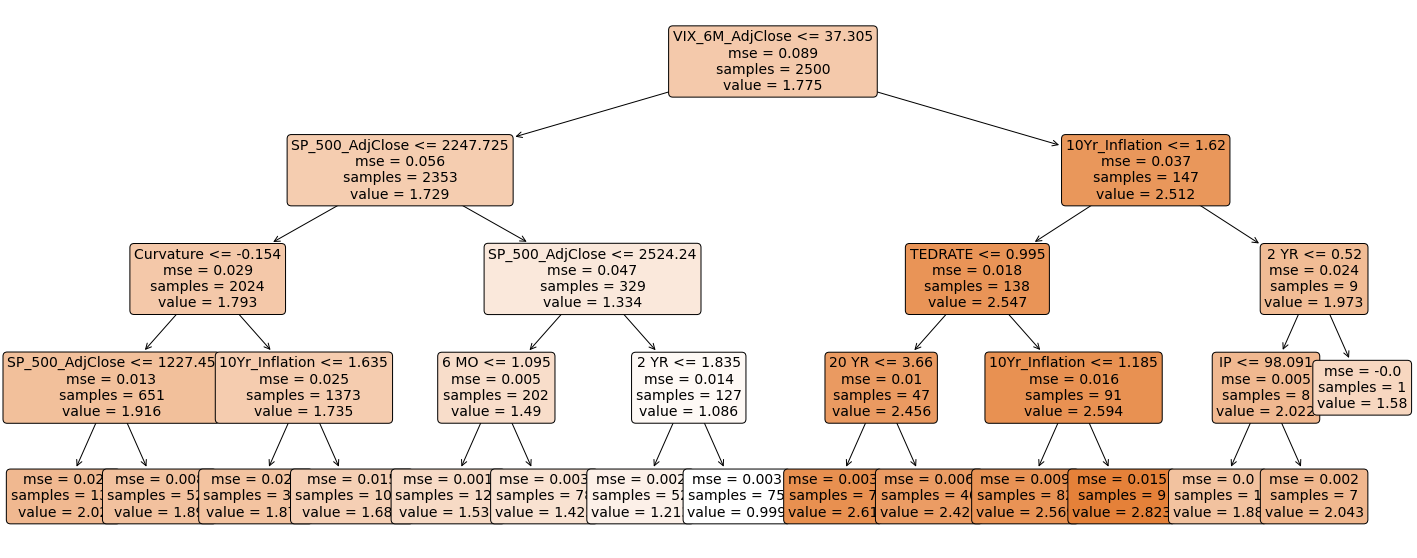

In [40]:
#PRE - PCA

clf = DecisionTreeRegressor(max_depth=4) #max_depth is maximum number of levels in the tree
clf.fit(x_train_pre_pca, y_train_pre_pca)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              filled=True, 
            feature_names=x_train_pre_pca.columns, 
              rounded=True, 
              fontsize=14)

In [41]:
y_pred_dt_pre_pca = clf.predict(x_test_pre_pca)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_pre_pca, y_pred_dt_pre_pca))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_pre_pca, y_pred_dt_pre_pca))

Mean squared error: 0.04
Coefficient of determination: 0.52


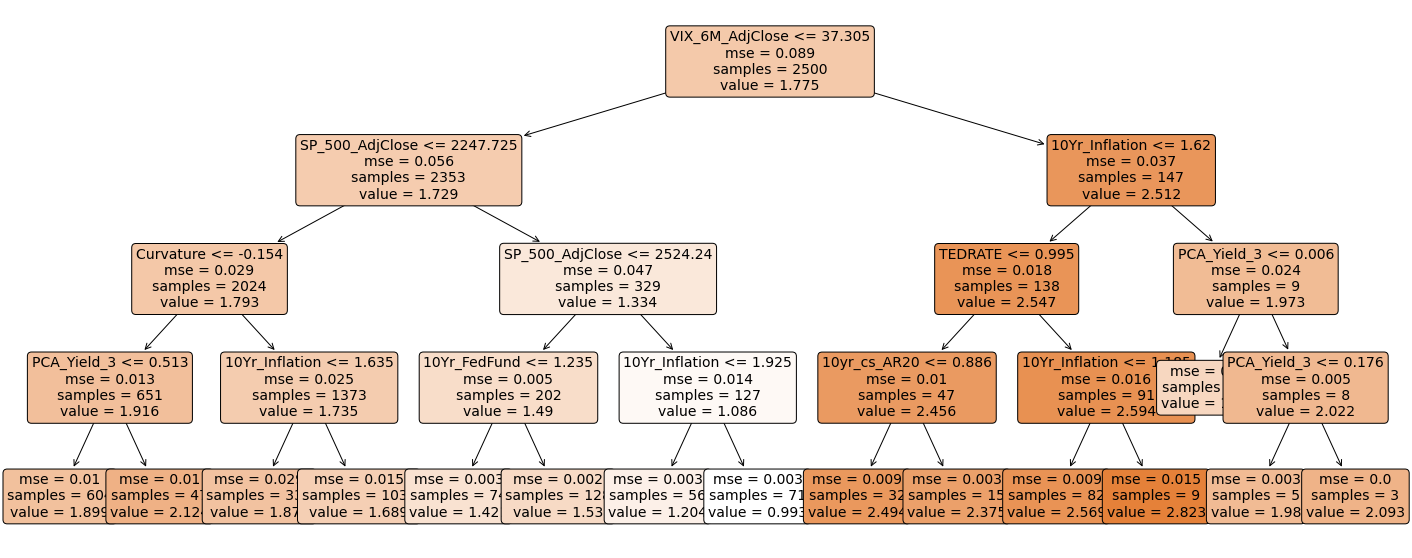

In [42]:
#POST - PCA

clf = DecisionTreeRegressor(max_depth=4) #max_depth is maximum number of levels in the tree
clf.fit(x_train_post_pca, y_train_post_pca)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              filled=True, 
            feature_names=x_train_post_pca.columns, 
              rounded=True, 
              fontsize=14)

In [43]:
y_pred_dt_post_pca = clf.predict(x_test_post_pca)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_post_pca, y_pred_dt_post_pca))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_post_pca, y_pred_dt_post_pca))

Mean squared error: 0.02
Coefficient of determination: 0.67


## 4.3 Random forest

#### As we have 24 variables and 1 target variable, PCA is not required. While applying PCA with more variables, the number of components can be decided on the Explained Variance % metric. Ideally we should have higher explained variance % with as minimal components as possible.

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [0]:
rf = RandomForestRegressor()
rf_model_pre = rf.fit(x_train_pre_pca, y_train_pre_pca)
y_pred_rf_pre = rf.predict(x_test_pre_pca)

In [46]:
# performance metrics for train data 

y_pred_train_rf_pre =  rf.predict(x_train_pre_pca)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train_pre_pca, y_pred_train_rf_pre))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train_pre_pca, y_pred_train_rf_pre))


Mean squared error: 0.00
Coefficient of determination: 1.00


In [47]:
# performance metrics for test data 

print('Mean squared error: %.2f'
      % mean_squared_error(y_test_pre_pca, y_pred_rf_pre))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_pre_pca, y_pred_rf_pre))

Mean squared error: 0.02
Coefficient of determination: 0.77


In [48]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train_pre_pca.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
SP_500_AdjClose,0.337190
VIX_6M_AdjClose,0.267686
10Yr_Inflation,0.122560
Curvature,0.077940
VIX_AdjClose,0.036393
TEDRATE,0.029254
IP,0.022805
6 MO,0.016310
10yr_cs_AR60,0.015817
5 YR,0.012421


#### Tuning the Random forest parameters for reducing the overfitting


In [0]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = [3,4,5]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10 , num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [20, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10, 20, 40]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_pre_pca, y_train_pre_pca)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [51]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 100,
 'n_estimators': 150}

### Random forest - hyper parameter tuning (using above derived best parameters)

In [0]:
rf_hp = RandomForestRegressor( bootstrap = True, max_depth= 6,max_features= 5,min_samples_leaf= 40,min_samples_split= 100,n_estimators= 200)
rf_model_hp = rf_hp.fit(x_train_pre_pca, y_train_pre_pca)
y_pred_rf_hp = rf_hp.predict(x_test_pre_pca)

In [53]:
# performance metrics for train data 

y_pred_train_rf_hp =  rf_hp.predict(x_train_pre_pca)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train_pre_pca, y_pred_train_rf_hp))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train_pre_pca, y_pred_train_rf_hp))

#increase of estimators, coefficient of determination decreases in negative terms like from -0.65 to -0.57

Mean squared error: 0.01
Coefficient of determination: 0.91


In [54]:
# performance metrics for test data 

print('Mean squared error: %.2f'
      % mean_squared_error(y_test_pre_pca, y_pred_rf_hp))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_pre_pca, y_pred_rf_hp))

#increase of estimators, coefficient of determination decreases in negative terms like from -0.65 to -0.57

Mean squared error: 0.02
Coefficient of determination: 0.73


In [55]:
feature_importances = pd.DataFrame(rf_hp.feature_importances_,
                                   index = x_train_pre_pca.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
SP_500_AdjClose,0.138798
10Yr_Inflation,0.125169
VIX_6M_AdjClose,0.120269
VIX_AdjClose,0.096069
Slope,0.084760
UNRATE,0.071534
IP,0.069280
TEDRATE,0.052349
3 MO,0.032611
1 YR,0.032395


## Plot the graphs to see credit spread prediction results using regression tools

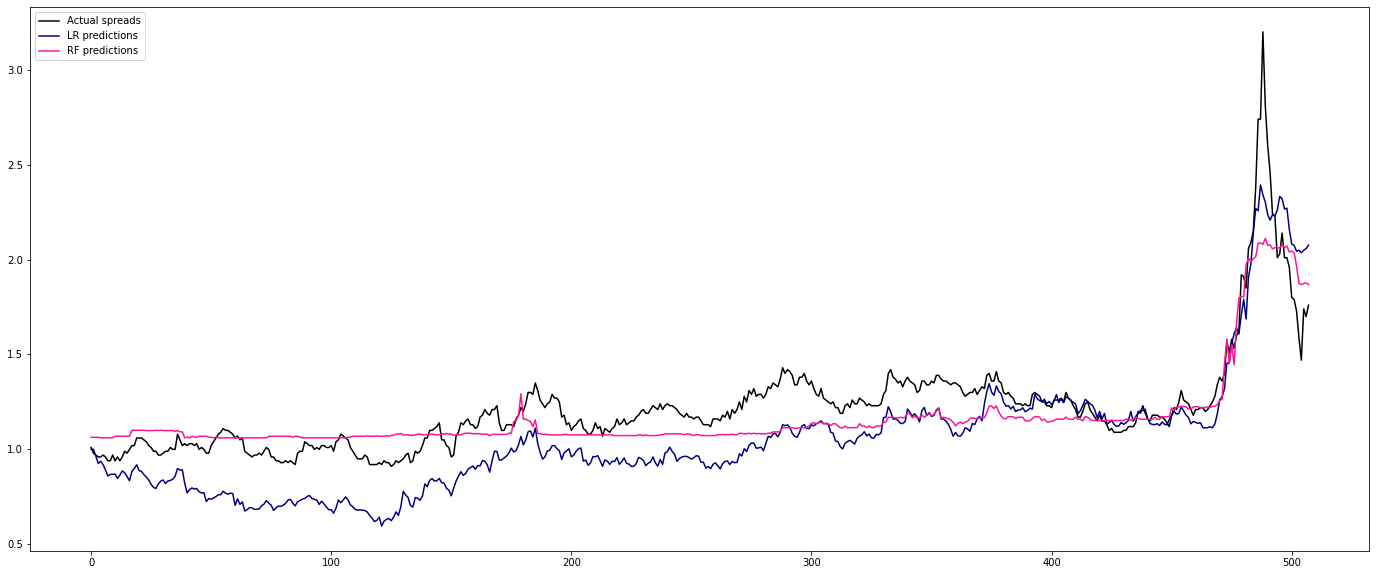

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,10))
pd.Series(np.array(y_test_pre_pca)).plot(kind='line', color= 'black', label='Actual spreads')
pd.Series(y_pred_lr_pre_pca).plot(kind='line', color = 'navy', label='LR predictions')
pd.Series(y_pred_rf_hp).plot(kind='line', color = 'deeppink', label='RF predictions')
plt.legend(loc='best')
plt.show()


# #Random forest has less MSE than Linear regression
# #Although direction is okay, magnitude is not okay, so applying LSTM

## 4.4 Bayesian Additive Regression Trees (BART)

In [57]:
!pip install bartpy


In [58]:
!pip install git+https://github.com/JakeColtman/bartpy.git --upgrade

  Cloning https://github.com/JakeColtman/bartpy.git to /tmp/pip-req-build-n3zwe2eh
  Running command git clone -q https://github.com/JakeColtman/bartpy.git /tmp/pip-req-build-n3zwe2eh
  Created wheel for bartpy: filename=bartpy-0.0.2-cp36-none-any.whl size=52925 sha256=391ec6b01ebe93c60e751edb90474fc67208bb8a90a24f0f08737de3cfbaaec6
  Stored in directory: /tmp/pip-ephem-wheel-cache-or8l7x_b/wheels/d0/68/c7/1d2011432af21adf799c86f26caaf5fa17ec26188a17b06dff
Successfully built bartpy
  Found existing installation: bartpy 0.0.2
    Uninstalling bartpy-0.0.2:
      Successfully uninstalled bartpy-0.0.2


In [0]:
from bartpy.sklearnmodel import SklearnModel

In [60]:
model = SklearnModel(n_trees = 500,n_samples=2500) # Use default parameters
model.fit(x_train_pre_pca, y_train_pre_pca) # Fit the model

SklearnModel(alpha=0.95, beta=2.0, initializer=None, n_burn=200, n_chains=4,
             n_jobs=-1, n_samples=2500, n_trees=500, sigma_a=0.001,
             sigma_b=0.001, store_acceptance_trace=False,
             store_in_sample_predictions=False, thin=0.1,
             tree_sampler=<bartpy.samplers.unconstrainedtree.treemutation.UnconstrainedTreeMutationSampler object at 0x7ff0a47a7c50>)

In [0]:
predictions = model.predict(x_train_pre_pca) # Make predictions on the train set
out_of_sample_predictions= model.predict(x_test_pre_pca) # Make predictions on new data

In [62]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_pre_pca, out_of_sample_predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_pre_pca, out_of_sample_predictions))

Mean squared error: 0.03
Coefficient of determination: 0.55


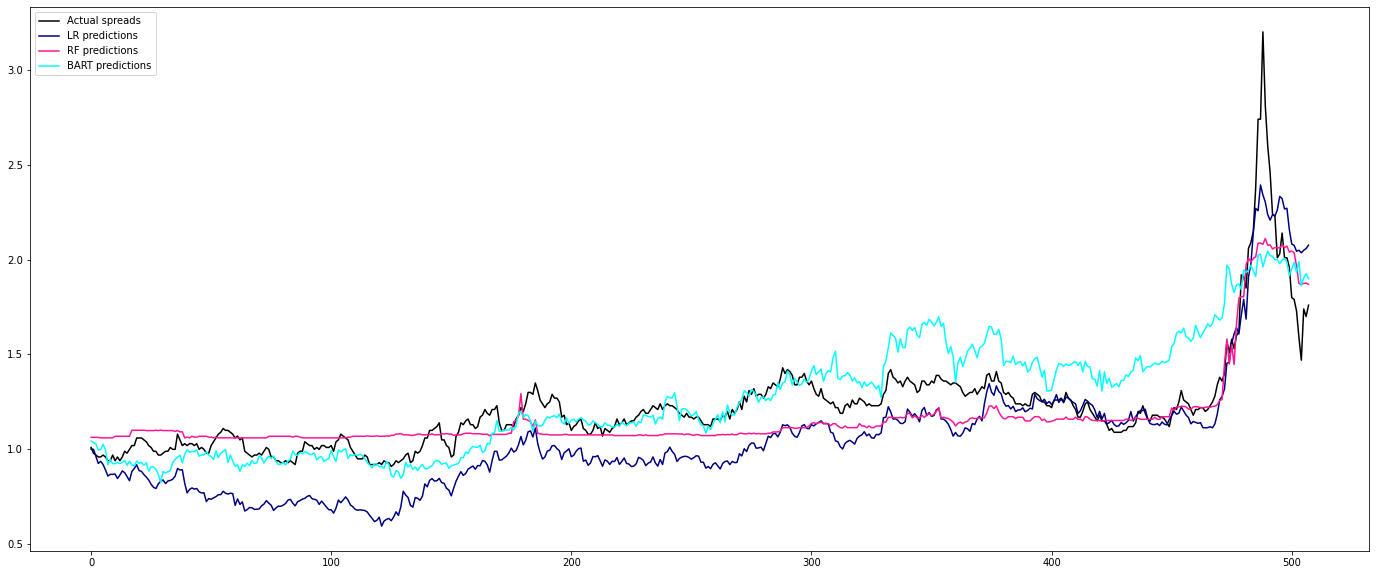

In [84]:
plt.figure(figsize=(24,10))
pd.Series(np.array(y_test_pre_pca)).plot(kind='line', color= 'black', label='Actual spreads')
pd.Series(y_pred_lr_pre_pca).plot(kind='line', color = 'navy', label='LR predictions')
pd.Series(y_pred_rf_hp).plot(kind='line', color = 'deeppink', label='RF predictions')
pd.Series(out_of_sample_predictions).plot(kind='line', color = 'cyan', label='BART predictions')

plt.legend(loc='best')
plt.show()

## Other methods

## Extra Trees Regressor

#### The main difference between random forests and extra trees lies in the fact that, instead of computing the locally optimal feature/split combination (for the random forest), for each feature under consideration, a random value is selected for the split (for the extra trees). 


In [0]:
from sklearn.ensemble import ExtraTreesRegressor

In [0]:
rf_extra = ExtraTreesRegressor(n_estimators=300, n_jobs=5)
rf_extra.fit(x_train_pre_pca, y_train_pre_pca)
y_pred_rf_extra_pre = rf_extra.predict(x_test_pre_pca)

#changing no. of jobs ,not much impact.. also no. of trees not impact much

In [65]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_pre_pca, y_pred_rf_extra_pre))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_pre_pca, y_pred_rf_extra_pre))


Mean squared error: 0.02
Coefficient of determination: 0.75


#### Extra trees seem to keep a higher performance in presence of noisy features. As all the variables are relevant, both methods seem to achieve the same performance

## XG Boost

In [66]:
# xgboost for regression
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
# x_train_pre_pca, y_train_pre_pca = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# evaluate the model
# model = XGBRegressor(objective='reg:squarederror')
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, x_train_pre_pca, y_train_pre_pca, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model_XGB = XGBRegressor(objective='reg:squarederror')
model_XGB.fit(x_train_pre_pca, y_train_pre_pca)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [67]:
x_test_pre_pca.shape, x_train_pre_pca.shape

((508, 24), (2500, 24))

In [0]:
xgb_y_pred = model_XGB.predict(x_test_pre_pca)

In [69]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_pre_pca, xgb_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_pre_pca, xgb_y_pred))


Mean squared error: 0.02
Coefficient of determination: 0.70


## 5. Long short-term memory (LSTM)

In [70]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

## 5.1 Training data

In [0]:
# fix random seed for reproducibility
np.random.seed(9)
# load the dataset
#dataframe = pd.DataFrame(combined["SPREAD"])
dataframe = pd.DataFrame(train["10yr_creditspread"])
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(dataset)
# split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size

In [0]:
dataframe_test = pd.DataFrame(test["10yr_creditspread"])
dataset_test  = pd.DataFrame(test["10yr_creditspread"]).values
dataset_test = dataset_test.astype('float32')
# normalize the dataset as per the fit_transform done in Training data
test = scaler.transform(dataset_test)

In [0]:
# reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

## 5.2 LSTM Model and results

In [75]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(50):
	print("complete: "+str(i) + "/50")
	model.fit(trainX, trainY, epochs=5, batch_size=batch_size, verbose=4, shuffle=False)
	model.reset_states()

complete: 0/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 1/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 2/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 3/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 4/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 5/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 6/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 7/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 8/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 9/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 10/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 11/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 12/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 13/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 14/50
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
complete: 15/50
Epoc

In [0]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [78]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 0.18 RMSE
Test Score: 0.08 RMSE


In [0]:
# shift train predictions for plotting
dataframe = pd.DataFrame(train)
dataset = dataframe.values
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(np.append(dataset, test, axis=0))
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(testPredictPlot)-1, :] = testPredict

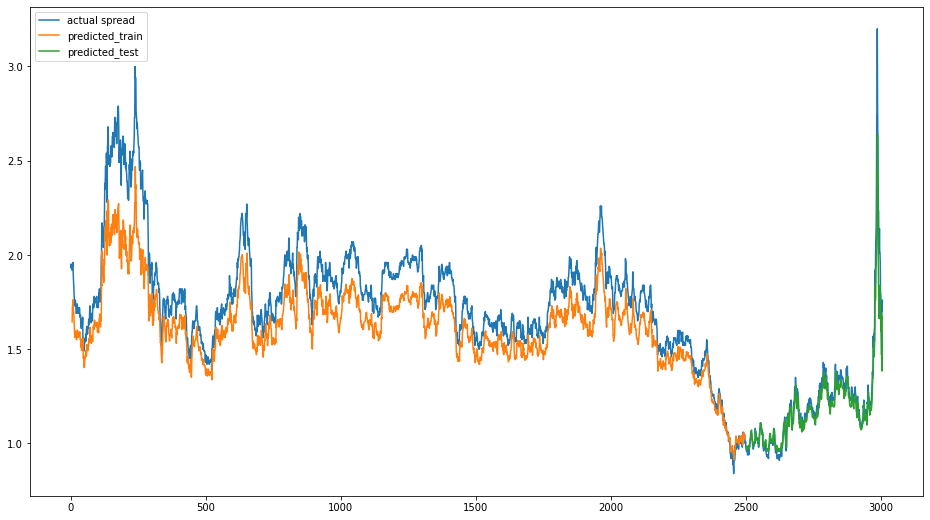

In [81]:
# plot baseline and predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(scaler.inverse_transform(np.append(dataset, test, axis=0)))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["actual spread","predicted_train","predicted_test"])
plt.show()